<div align="right">Python 2.7 Jupyter Notebook</div>

# Data analysis basics

### Your completion of the notebook exercises will be graded based on your ability to do the following:

> **Understand**: Do your pseudo-code and/or comments show evidence that you recall and understand technical concepts?

> **Apply**: Are you able to execute code (using the supplied examples) that performs the required functionality on supplied or generated data sets?

> **Analyze**: Are you able to pick the relevant method, library, or resolve specific stated questions?

> **Evaluate**: Are you able to interpret the results and justify your interpretation based on the observed data?

> **Create**: Are you able to produce notebooks that serve as computational records of a session, and which can be used to share your insights with others?

#### Notebook objectives
By the end of this notebook, you will be expected to:

>  - Explain the **5 Rs** for assessing data quality;
 - Import various types of data (delimited, JSON, and SQL) into Python, using the Pandas module;
 - Manipulate data using Pandas (selecting, filtering, grouping, and transformation); and
 - Import and use matplotlib to visualize data for exploratory and reporting purposes.
 
####  List of exercises
>   - Exercise 1: Working with DataFrames.
  - Exercise 2: Data exploration.
  - Exercise 3: Matplotlib.

# Notebook introduction

When you create notebooks or other documents, it is generally a good idea to continually document your progress, and provide descriptions of the data set, as well as your observations. This makes it easier to revisit your work at a later stage or share it with other parties. This notebook provides the opportunity to explore the given data set on your own, as you would in a real-world data analysis setting.

You will be introduced to a number of techniques and best practices that you may utilize in later modules.

> **Note**: 

> It is strongly recommended that you save and checkpoint after applying significant changes or completing exercises. This allows you to return the notebook to a previous state, should you wish to do so. On the Jupyter menu, select "File", then "Save and Checkpoint" from the dropdown menu that appears.

#### Load the relevant libraries and set options
When performing analysis tasks, you can load the libraries, as and when you need them at various points throughout the notebook. Many users have a frequently-used set of libraries and settings. Starting your notebook with a section containing all the libraries that you use, makes it easier to check that all the elements have been installed, should you choose to share the notebook with others, or if you intend to run the notebook on different machines. You can always revisit and re-execute this section of your notebook at a later stage, if you realize that you need to load additional libraries.

In [4]:
# Load the libraries that you will require in this notebook.
from os import path
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure, show, rc
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import json

# Set plotting options.
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

Populating the interactive namespace from numpy and matplotlib


> **Note**:

> The libraries utilized in this notebook are included with the Anaconda Python distribution, and you should not receive any errors when executing the section above. In subsequent notebooks and modules, you will make use of libraries that do not come preinstalled in Anaconda. These additional libraries were either pre-installed on the image used in the setup of your virtual analysis environment, or installed during the preparation phases of the various modules. Installing Anaconda on your own workstation is not encouraged during this course as there are too many factors to account for in standardizing the analysis environment.

# 1. Phases of analysis

In the video content in this module, David Shrier provided an overview of the phases of data analysis, as can be seen below:

![Phases of Data Analysis](m1_f1_data_analysis.PNG "This image shows the phases of the data analysis cycle.")

Some of the phases of this cycle are demonstrated in this notebook, and it is good to know that you have various methods available to document your interactive computing session. You can utilize code, traditional comments in code blocks, and a wide array of data input, processing, and output tools to perform your analysis and document your process. Markdown cells, which will be introduced in more detail in the next notebook, can also be utilized to provide instructions, format text, and embed images in order to convey your message to your intended target audience.

## 1.1 Example: Generate a polar plot to indicate the typical analytical journey
To demonstrate the efficiency of visual communication, a polar plot has been selected as the basis from which to communicate a concept. The graph values do not have any meaning or relevance apart from demonstrating that the typical analysis cycle is usually iterative, and converges on a result.

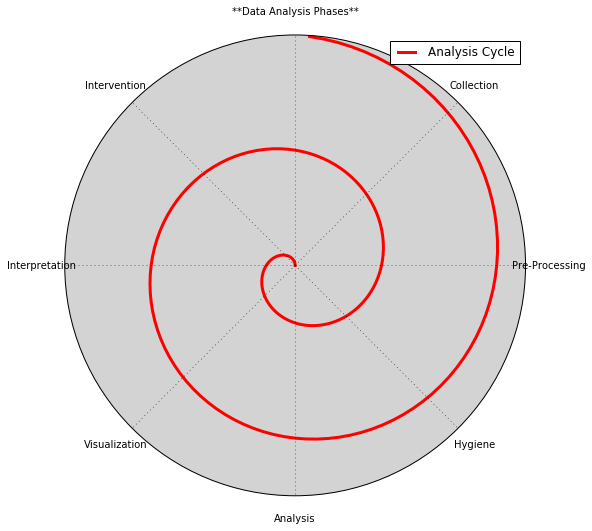

In [3]:
# Generate input data.

# Numpy array with minimum, maximum and increment specified.
# Change the maximum from 2.0 to 4.0 to simulate a longer analytic journey.
r = np.arange(0, 2.0, 0.01) 

# Utilize Numpy constant Pi.
theta = 2*np.pi*r

# Set plotting options and plot.
fig = figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection='polar', axisbg='#d3d3d3')
ax.plot(theta, r, color='r', lw=3, label='Analysis Cycle')
ax.set_xticklabels(['**Data Analysis Phases**', 'Intervention', 'Interpretation', 'Visualization', 'Analysis', 'Hygiene', 'Pre-Processing', 'Collection'])
ax.set_theta_zero_location('N')
ax.axes.get_yaxis().set_ticks([])
ax.legend()
show()

# 2. Understanding and working with Big Data

Many people associate big data with the three Vs model – **volume**, **velocity**, and **variety** – that was introduced by Gartner's [Doug Laney](http://blogs.gartner.com/doug-laney/files/2012/01/ad949-3D-Data-Management-Controlling-Data-Volume-Velocity-and-Variety.pdf). According to this model, the challenges of big data management result from the expansion of all three properties, rather than just the volume of the data alone. The three Vs model is undoubtedly important in describing the technical challenges in the management and processing of big data. However, for analysts, researchers, and decision makers interested in deriving insights from big data, alternative characterizations, building on the three Vs model, may be more appropriate in order to understand and relate to the complexities and value that big data brings. In other words, and from our perspective, a big data approach means collecting as much information as possible, and then assessing its value.

## 2.1 The 5 Rs of data quality
In the video content in this module, David Shrier discusses the following 5 Rs of data quality:

1. **Relevancy**
> This characteristic relates to data fidelity to the research or business objective at hand, and guides how you (as application developers, for example) can design an application that provides enough value to users for them to be willing to give you access to what they consider their most private information.

- **Recency**
> One characteristic of the three Vs model – velocity – affects the time-to-value of data from creation, collection, and usage. Data is constantly changing, and knowing its recency is important for understanding its utility. The question to keep in mind when working with any information is: “How rapidly does that information go out of date?” The latency can come from different phases of analysis.

- **Range**
> Understanding coverage and granularity of data required for answering research or business questions helps in shaping our hypotheses or what conclusions are possible from data collected

- **Robustness**
> As the volume of the data available for detecting patterns grows exponentially, the number of possible correlations grows a lot faster than the number of meaningful or useful ones. That is, the noise grows faster than the signal, as shown in the figure below.
> ![As data gets bigger, noise grows faster than signal.](snr_overtone.png "As data gets bigger, noise grows faster than signal.")
> Source: [Going Pro in Data Science - What It Takes to Succeed as a Professional Data Scientist by Jerry Overton](http://www.oreilly.com/data/free/going-pro-in-data-science.csp).

- **Reliability**
>  An important recurring theme in this course is the importance of correctly collecting data. In social analytics, data collecting using well-established techniques, such as using focus or surveys,  are more often not associated with accurate or reliable data. 


## 2.2 Ephemeral vs durable data
Another related concept in data quality is the need to distinguish between fast- and slow-changing data (i.e., ephemeral and durable data, respectively). Understanding if you have ephemeral data, which changes and decays rapidly, or durable data, which is slow to change, is one of the dimensions of data that is helpful in understanding data quality.

> **Note**:

> Remember that context matters. When performing analysis you have to critically evaluate whether the data quality is adequate for the type of problem that you are trying to solve. 


# 3. Data analysis in Python using Pandas

As you should have gathered from the previous notebook, Python is an intuitive, beginner-friendly, general-purpose programming language. Unfortunately, because it is a general-purpose language, it lacks out-of-the-box and easy-to-use functionality for data processing and analysis that analysts can use without effort. Because of this, data analysts use Python modules designed specifically to extend Python's base functionality when doing data analysis. One of the modules that will be used extensively in this course is [Pandas](http://pandas.pydata.org/) (short for Python for Data Analysis), which is a module designed around providing flexible data structures and data manipulation in Python. Specifically, Pandas uses the concept of a [data frame](pandas.pydata.org/pandas-docs/stable/dsintro.html), which is defined below:

> A data frame generally refers to "tabular" data, that is, a data structure representing cases (rows), each of which consists of a number of observations or measurements (columns). Each row may be treated as a single observation of multiple variables (or fields in relational database systems). Each row and each column has the same data type, but the row ("record") data type may be heterogeneous (a tuple of different types), while the column data type must be homogeneous. In addition to the data, data frames usually contain some metadata, for example, column and row names.

Below is a list of [data frame features](http://wesmckinney.com/blog/a-roadmap-for-rich-scientific-data-structures-in-python/). Data frames allow for the following:
- Manipulation of heterogeneously-typed data.
- Size mutability. Users can easily add "columns" or N-1-dimensional hyperslices without necessarily copying data.
- Metadata to be represented by each axis; axis=3 is less meaningful than axis='temperature'.
- Metadata to be about axis labels (ticks).
- Label or tick-based data alignment or reshaping, which is either automatic or explicit.
- Label or tick-based (fancy) indexing, both in terms of setting and getting.
- Hierarchical columns.
- Robust handling of missing or not-applicable (NA) data.
- Operations needing heterogeneous data and metadata. These include group by, filtering, sorting, selection or querying, reindexing (reshaping to conform to a new set of labels), axis selection based on names, data normalization, etc.

Data cleaning and exploratory analysis are often the preliminary steps to carry out when confronted with the challenge of extracting useful insights from data. Exploring data prior to doing any deeper analysis allows you to answer questions about data quality. The following sections demonstrate how to use Pandas, and related Python operations, to understand data quality.

## 3.1 Importing data
A lot of the input data that will be available will be stored in either files or databases. This section will introduce examples to show syntax and functionality, but will restrict use to flat files in most cases. You can read from and write to a multitude of data storage structures, including relational databases and non-relational data storage structures such as Hadoop. When you start to approach the boundaries of the available memory and compute capacities of your infrastructure, it is likely time to switch to a data storage system that better supports your needs. However, from an analysis perspective, the most important aspect is being able to interrogate and analyze the data.

### 3.1.1 Loading CSV files
> CSV files include both a delimiter, separating data fields, and an optional enclosing character. While a comma ( , ) is usually used as a delimiter (hence the term CSV, which is the abbreviation for comma-separated values), other common delimiters include a pipe ( | ), a tab ( \t ), or any single value character (e.g., : ). An enclosing character occurs at the beginning and the end of a value. It is sometimes called a quote character (because it is usually double quotation marks), but other characters can be used.

In the first example, a sample CSV file that contains four columns and three rows is loaded. First, you load the pandas module and assign it a name in the local namespace for easy reference.

In [5]:
import pandas as pd

For illustration purposes only, let’s first see what the file looks like on disk. If you are not familiar with command line utilities, the next command does the following. Firstly, the exclamation tells the interpreter to invoke executable statement in the system shell. The “```cat```” command reads one or more files, in this case "workbook.csv", and prints them to standard output.

In [6]:
# Read the file "workbook.csv" and print the contents.
!cat workbook.csv

A;B;C;D
1;4;7;10
2;5;8;11
3;6;9;12


As described earlier, the file is a CSV file with a ";" delimiter separating the four fields. Now, use the pandas read_csv method to read the file. By default, read_csv assumes the delimiter is a comma. However, since you know that your delimiter is a semi-colon, explicitly tell pandas to use ";" as the separator.

In [7]:
sample_data= pd.read_csv('workbook.csv', sep=";")
sample_data

,A,B,C,D
0,1,4,7,10
1,2,5,8,11
2,3,6,9,12


Notice that Pandas automatically includes indexes to label the rows and columns. In particular, the rows are indexed by a sequence of labels [0, 1, 2], while the first row is assumed to be a header row, and used as such. This behavior can be changed if you know that the file does not contain a header row. In this case, the columns will be labeled in a similar manner to the rows.

In [8]:
sample_data= pd.read_csv('workbook.csv', sep=";", header=None)
sample_data

,0,1,2,3
0,A,B,C,D
1,1,4,7,10
2,2,5,8,11
3,3,6,9,12


### 3.1.2 JSON strings
JavaScript Object Notation (JSON) is a lightweight data-interchange format that is easy to read and write for humans, and easy to parse and generate for computers. The JSON format is often used for serializing and transmitting structured data over a network connection. It is used primarily to transmit data between a server and web application, serving as an alternative to XML (EXtensible Markup Language). Twitter stores data in JSON. Interestingly, the Jupyter Notebook that you are working in uses a JSON format to store its data. In general, you can think of the JSON format as a store of data whose structure you do not know at the time of capture, (i.e., unstructured data).

JSON is built on two structures:
- **A collection of name or value pairs**: In various languages, this is realized as an object, record, struct, dictionary, hash table, keyed list, or associative array.
- **An ordered list of values**: In most languages, this is realized as an array, vector, list, or sequence.

You can read more about the [Python encoder and decoder](https://docs.python.org/2/library/json.html) in the Python documentation.

The following example creates a JSON string, and demonstrates how Pandas can be used to read the string.

In [9]:
# Create a JSON string that captures details of a John Smith from New York.
jsonStr = '{\
     "firstName": "John",\
     "lastName": "Smith",\
     "address": {\
         "streetAddress": "21 2nd Street",\
         "city": "New York", \
         "state": "NY",\
         "postalCode": 10021 \
     }, \
     "phoneNumbers": [ \
         "212 555-4321", \
         "646 555-7654" \
     ]\
 }'

Your JSON string is technically a single expression spanning multiple lines in the cell. To indicate that the multiple lines constitute a single expression, and are a continuation of the expression from the previous line, use a backward slash “```\```”. Let’s display the JSON string object you have just created. Print the JSON string (you do not need to be concerned with the underlying details of the different calls being made).

In [10]:
print(json.dumps(json.loads(jsonStr), indent=4, sort_keys=True))

{
    "address": {
        "city": "New York", 
        "postalCode": 10021, 
        "state": "NY", 
        "streetAddress": "21 2nd Street"
    }, 
    "firstName": "John", 
    "lastName": "Smith", 
    "phoneNumbers": [
        "212 555-4321", 
        "646 555-7654"
    ]
}


Pandas has a ```read_json()``` method that reads JSON objects into a Pandas Series or DataFrame object.
> **Note**: You can access the docstring for any of these Pandas objects by appending a question mark to the object or method name. Thus, “```pd.read_json?```” will display the docstring containing more details on what the read_json method does and how it is to be used. This information is displayed in a popup box that you can close by clicking the **x** in the top right.

In [11]:
# Read JSON-formatted data using pandas and print the dataframe.
df = pd.read_json(jsonStr, orient='columns', typ='series')
print(df)

address         {u'postalCode': 10021, u'city': u'New York', u...
firstName                                                    John
lastName                                                    Smith
phoneNumbers                         [212 555-4321, 646 555-7654]
dtype: object


### 3.1.3 Working with relational databases
In most organizations, SQL-based relational databases are the most common systems used as data stores. Accessing data from a database like SQL is not only more efficient, it also allows you to subset and import only the parts of the data that you need. In Python, the SQLite3 module provides a straightforward interface for interacting with SQLite databases. [SQLite](https://docs.python.org/2/library/sqlite3.html?highlight=sqlite#module-sqlite3) is a lightweight, disk-based database that does not require a separate server process. Other databases would require different libraries and connection strings, but are very similar to the example demonstrated below. The structure of the example is based on the resource provided earlier in this paragraph, and provides good input with regard to the use and best practices of SQLite databases.

In [12]:
# Import the sqlite library and open the database.
import sqlite3

##### Connect to your database, create a table, and add some sample data.

In [13]:
# Connect to your database.
conn = sqlite3.connect('example.db')

# Set the connection cursor.
c = conn.cursor()

# Create table.
c.execute('''CREATE TABLE IF NOT EXISTS students
             (id INTEGER PRIMARY KEY, industry text, country text, city text)''')

# Insert 3 rows.
c.execute("INSERT INTO students VALUES (NULL, 'Agriculture', 'Australia', 'Perth')")
c.execute("INSERT INTO students VALUES (NULL, 'Arts & Education', 'Greece', 'Thessaloniki')")
c.execute("INSERT INTO students VALUES (NULL, 'Public Sector', 'United States','San Francisco')")

# Save (commit) the changes.
conn.commit()

# Make sure that any changes have been committed before closing the connection. 
# If the previous step was not completed, any changes that you have made will be lost.
conn.close()

> **Note**: 

> If you choose a filename, "example.db" in the example above, and it does not exist, it will be created for you.

> No checks have been added, so executing the cell above multiple times will keep on adding duplicates of the same three rows.

##### Retrieve the data in your database.

In [16]:
# Connect to your database and set the cursor.
import sqlite3
conn = sqlite3.connect('example.db')
c = conn.cursor()

# Fetch the records.
c.execute('SELECT * FROM students')

# Print the result set row by row.
for row in c.execute('SELECT * FROM students ORDER BY id'):
        print row

# Close the connection.
c.close()

(1, u'Agriculture', u'Australia', u'Perth')
(2, u'Arts & Education', u'Greece', u'Thessaloniki')
(3, u'Public Sector', u'United States', u'San Francisco')
(4, u'Agriculture', u'Australia', u'Perth')
(5, u'Arts & Education', u'Greece', u'Thessaloniki')
(6, u'Public Sector', u'United States', u'San Francisco')
(7, u'Agriculture', u'Australia', u'Perth')
(8, u'Arts & Education', u'Greece', u'Thessaloniki')
(9, u'Public Sector', u'United States', u'San Francisco')


##### Delete a subset of records from your database.

In [15]:
# Connect to your database and set the cursor.
import sqlite3
conn = sqlite3.connect('example.db')
c = conn.cursor()

# Delete all records where the id is greater than 1.
c.execute('DELETE FROM students WHERE id > 1')

# Fetch the records.
c.execute('SELECT * FROM students')

# Print the result set row by row.
for row in c.execute('SELECT * FROM students ORDER BY id'):
        print row

# Close the connection.
c.close()

(1, u'Agriculture', u'Australia', u'Perth')


### 3.1.4 Accessing data stored in SQLite using Python and Pandas
Using Pandas, you can import the results of an SQLite query into a data frame. Note that you can use the same SQL commands or syntax that you used in the SQLite lesson. An example of using Pandas together with SQLite is shown below:

In [17]:
import pandas as pd
import sqlite3

# Read sqlite query results into a pandas DataFrame ordered by id in descedning order.
con = sqlite3.connect("example.db")
df = pd.read_sql_query("SELECT * from students ORDER BY id desc", con)

# Verify that result of SQL query is stored in the dataframe.
print(df.head())

# Close the connection.
con.close()

   id          industry        country           city
0   9     Public Sector  United States  San Francisco
1   8  Arts & Education         Greece   Thessaloniki
2   7       Agriculture      Australia          Perth
3   6     Public Sector  United States  San Francisco
4   5  Arts & Education         Greece   Thessaloniki


## 3.2 Data exploration with Pandas
This section introduces other tools for pre-processing and exploring data in Python using Pandas. For this purpose, a data set that was collected using the StudentLife app, built by researchers from Dartmouth College, will be used. The Android app monitored readings from smartphone sensors carried by 48 Dartmouth students during a 10-week term. This was in order to assess their mental health (depression, loneliness, and stress), academic performance (grades across all their classes, term GPA, and cumulative GPA), and behavioral trends (how factors such as stress, sleep, and visits to the gym, change in response to college workload – assignments, midterms, and finals – as the term progresses).

Before you continue with the following section, please make sure that you visit [Dartmouth StudentLife](http://studentlife.cs.dartmouth.edu/dataset.html), and review the "Introduction" and "Citation" paragraphs to familiarize yourself with the privacy statements.

> **Note**:

> The data sets that you will start to use in this section will be utilized again in future modules and notebooks.

### 3.2.1 Loading the data

In [39]:
# Load a specified file to a Pandas dataframe.
df_gps = pd.read_csv('../data/dartmouth/location/gps_u02.csv')

### 3.2.2 Inspecting the data
The first step is to visually inspect the new data set. There are multiple ways to achieve this, the easiest being to request the first few records using the DataFrame “```head()```” method. By default, “```df.head()```” returns the first 5 rows from the DataFrame object ```df``` (excluding the header row). Alternatively, one can also use “```df.tail()```” to return the five rows of the data frame. For both ```head``` and ```tail``` methods, there is an option to specify the number of records by including the required number in between the parentheses when calling either method.

In [21]:
# Review the data with "head()".
# gps.tail() will return the records from the end of the dataset.
df_gps.head()

,time,provider,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travelstate
0,1364357797,network,wifi,20.0,43.707127,-72.293314,0.0,0.0,0.0,stationary
1,1364358997,network,wifi,20.0,43.707123,-72.293319,0.0,0.0,0.0,stationary
2,1364360197,network,wifi,20.0,43.707166,-72.293272,0.0,0.0,0.0,stationary
3,1364361397,network,wifi,20.0,43.707158,-72.293285,0.0,0.0,0.0,stationary
4,1364362597,network,wifi,20.0,43.707131,-72.293320,0.0,0.0,0.0,stationary


In [22]:
df_gps.tail()

,time,provider,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travelstate
6602,1370054701,network,wifi,60.935,43.707113,-72.293186,0.0,0.0,0.0,stationary
6603,1370055301,network,wifi,59.683,43.707161,-72.293165,0.0,0.0,0.0,stationary
6604,1370055901,network,wifi,60.811,43.707155,-72.293197,0.0,0.0,0.0,stationary
6605,1370056501,network,wifi,63.253,43.707124,-72.293179,0.0,0.0,0.0,stationary
6606,1370057094,network,wifi,59.327,43.707131,-72.293187,0.0,0.0,0.0,stationary


You can check the number of cases, as well as the number of fields, using the ```shape``` method, as shown below.

In [23]:
df_gps.shape

(6607, 10)

In the result displayed, you can see the data has 6,607 records, each with 10 columns.

The “info()” and “describe()” methods can also be used to provide additional information about the data set. The “```info()```” method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.

In [ ]:
# Review data types with "info()".
df_gps.info()

The “```describe()```” DataFrame method returns summary statistics for a quick and simple description of the data. These include count, mean, median, mode, minimum value, maximum value, range, and standard deviation.

In [24]:
# Review numeric data with "describe()".
df_gps.describe()

,time,accuracy,latitude,longitude,altitude,bearing,speed
count,6.607000e+03,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,1.367687e+09,74.158883,43.706182,-72.292437,5.554109,2.390404,0.032516
std,1.624653e+06,255.141546,0.025016,0.017621,27.636964,23.205340,0.625369
min,1.364358e+09,3.000000,43.512803,-72.754270,0.000000,0.000000,0.000000
25%,1.366349e+09,25.118500,43.706573,-72.293224,0.000000,0.000000,0.000000
50%,1.368036e+09,36.122000,43.707108,-72.293184,0.000000,0.000000,0.000000
75%,1.369049e+09,58.230000,43.707131,-72.288852,0.000000,0.000000,0.000000
max,1.370057e+09,4027.000000,44.353047,-72.267886,306.100006,351.700000,35.003570


### 3.2.3 Indexing and selecting data
Data loaded using Pandas is automatically appended with metadata for axis labeling, which does the following:
- Identifies data (i.e., provides metadata) using known indicators, which is important for analysis, visualization, and interactive console display.
- Enables automatic and explicit data alignment.
- Allows intuitive getting and setting of subsets of the data set.

The following examples demonstrate how to slice, dice, and generally get and set subsets from pandas objects.
> While Python and NumPy indexing operators “[]” and attribute operator “.” provide quick and easy access to Pandas data structures across a wide range of use cases, directly using these standard operators has some optimization limits, and is not recommended for producing code. You are encouraged to familiarize yourself with, and become confident in, using the optimized Pandas data access methods discussed in this notebook.

The “```.loc```” attribute is the primary access method. The following values are valid inputs:
- A single label (e.g., 5 or 'a'). (Note that 5 is interpreted as a label of the index. This use is not an integer position along the index.)
- A list or array of labels ['a', 'b', 'c'].
- A slice object with labels 'a':'f'. (Note that contrary to usual python slices, both the start and the stop are included.)
- A boolean array.

In [ ]:
# Select the first 10 rows.
df_gps.loc[0:9]

In [25]:
# Select the columns ('provider','latitude','longitude') for the rows labelled 10,11, ...,15.
df_gps.loc[10:15, ['provider','latitude','longitude']]

,provider,latitude,longitude
10,network,43.707163,-72.293251
11,network,43.707155,-72.293281
12,network,43.707156,-72.293238
13,network,43.707152,-72.293245
14,network,43.707128,-72.293309
15,network,43.707159,-72.293255


In [26]:
# Access records where the provider is 'gps'. Return the first 5 rows from the filtered data frame.
df_gps.loc[df_gps['provider']=='gps', :].head()

,time,provider,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travelstate
6,1364365002,gps,NaN,8.0,43.707182,-72.292976,159.500000,0.0,0.00,NaN
21,1364382891,gps,NaN,13.0,43.707372,-72.293165,144.899994,0.0,0.00,NaN
125,1364507801,gps,NaN,10.0,43.706560,-72.292041,138.199997,148.7,1.25,NaN
171,1364562996,gps,NaN,19.0,43.707121,-72.293339,119.199997,0.0,0.00,NaN
173,1364565402,gps,NaN,10.0,43.707235,-72.285593,150.100006,33.2,1.75,NaN


Pandas provides a suite of methods that can be used to obtain purely integer-based indexing. These are 0-based indexes. When slicing, the start bound is included, while the upper bound is excluded. The “.iloc” attribute is the primary access method. The following values are valid inputs:
- An integer (e.g., 5).
- A list or array of integers [4, 3, 0].
- A slice object with integers 1:7.
- A boolean array.

In [27]:
# Select the first two rows using intger-based indexing.
df_gps.iloc[0:2,:]

,time,provider,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travelstate
0,1364357797,network,wifi,20.0,43.707127,-72.293314,0.0,0.0,0.0,stationary
1,1364358997,network,wifi,20.0,43.707123,-72.293319,0.0,0.0,0.0,stationary


In [28]:
# Select the first 5 rows and columns numbered 2, 3, and 4. 
df_gps.iloc[0:5,2:5]

,network_type,accuracy,latitude
0,wifi,20.0,43.707127
1,wifi,20.0,43.707123
2,wifi,20.0,43.707166
3,wifi,20.0,43.707158
4,wifi,20.0,43.707131


### 3.2.4 Split-apply-combine

When approaching a data analysis problem, it is a good idea to break it into manageable pieces, perform some operations on each of the pieces, and then put everything back together again. The Pandas “groupby” method draws largely from the [split-apply-combine strategy](https://www.jstatsoft.org/article/view/v040i01/v40i01.pdf) for data analysis. For example, say you are interested in splitting your data depending on the provider type. The following example illustrates the use of “groupby()” on your DataFrame.

In [33]:
grp = df_gps.groupby(['provider'])
print(grp)

Calling "```count```" on the grouped object returns the total number of **non-null** values within each column. 

In [32]:
grp.count()

time  network_type  accuracy  latitude  longitude  \
provider travelstate                                                      
network  moving        999           999       999       999        999   
         stationary   5291          5291      5291      5291       5291   

                      altitude  bearing  speed  
provider travelstate                            
network  moving            999      999    999  
         stationary       5291     5291   5291

To get the total number of records in each group, you can use the "size".

In [37]:
grp.size()

provider
gps         263
network    6344
dtype: int64

If we are interested in the average accuracy for each of the groups, we can do the following:

In [ ]:
grp.mean()['accuracy']

The Pandas [groupby()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) method also accepts a list of fields as an argument. The syntax is ``DataFrame.groupby(['field 1', 'field 2'])``.

<br>
<div class="alert alert-info">
<b>Exercise 1 start: DataFrames.</b>
</div>

### Instructions
1. Group the data frame by both the "provider" and "travelstate" fields (in that order) using the "```groupby```" method.
2. Apply a "```count```" method to the result, and print the final output.
3. For each provider value (that is, network and GPS), how many records have a "stationary" and how many have a "moving" travelstate?

In [43]:
ex1 = df_gps.groupby(['provider','travelstate'])

In [44]:
ex1.count()

time  network_type  accuracy  latitude  longitude  \
provider travelstate                                                      
network  moving        999           999       999       999        999   
         stationary   5291          5291      5291      5291       5291   

                      altitude  bearing  speed  
provider travelstate                            
network  moving            999      999    999  
         stationary       5291     5291   5291

In [38]:
ex1.size()

provider  travelstate
network   moving          999
          stationary     5291
dtype: int64

<br>
<div class="alert alert-info">
<b>Exercise 1 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

### 3.2.5 Data transformation

Sometimes you are provided with data that needs to be transformed into a form that is more familiar, so that you can do other analyses, or search for patterns or other insights. DataFrames in Pandas are equipped with an "```apply```" method that can help with such transformation. These transformations may require the use of other functions. For example, the time field in your GPS data is in a form called Unix time (also known as POSIX time or Epoch time), which is a system for describing instants in time, defined as the number of seconds that have elapsed since 00:00:00 Coordinated Universal Time (UTC), Thursday, 1 January 1970, not counting leap seconds. Unix time is a single signed integer number that increments every second, without requiring the calculations to determine year, month, day of month, hour, and minute, necessary for intelligibility to humans.

The Pandas “to_datetime” method will be used to convert the time into something that makes sense to you, by introducing another Python style construct called “**lambda**” functions inside an apply method. Python supports the creation of [anonymous functions](http://www.diveintopython.net/power_of_introspection/lambda_functions.html) (i.e., functions that are not bound to a name) at runtime, using a construct called "lambda". While using lambda expressions is never a necessity, they allow you to perform quick hacks without having to bloat your code base with too many rarely-used functions. Let’s now demonstrate using the apply method.

In [ ]:
df_gps.loc[:,['time']] = df_gps.time.apply(lambda x: pd.to_datetime(x,unit='s'))

In [ ]:
# Review the data, including the transformed column.
df_gps.head()

Now you can see the day and time in a representation that you are familiar with. This could be important, say, if you wanted to reduce the granularity of your data. For example, you can now group your data at an hourly or daily level, if necessary.

### 3.2.6 Data visualization using histograms

**Histograms** can be utilized to quickly compare subsets of the data. Let's look at the number of observations over time by provider.

In [ ]:
# Let's look at the observations or rows over time per provider as histograms.
df_gps['time'].hist(by=df_gps['provider'])

The “```hist()```” method provides a quick way of producing plots, but is limited in the options that can be specified. The plots produced above are good for visualizing the distribution of records over time, but have different scales on the y-axis. It is therefore easy to misinterpret the results. Matplotlib – which offers more configuration options – will be discussed later in this notebook.

<br>
<div class="alert alert-info">
<b>Exercise 2 start: Data exploration.</b>
</div>

### Instructions
1. Refer to Section 3.2.1 of this notebook.
 - Load the WIFI dataset provided in your "module_1" folder, to a variable called "ds_student". (The file name is "wifi_u02.csv".)
 - Print the head, specifying the number of records to be returned as 10.
 - Transform the time column into a "datetime" data type that humans can intelligently interpret.
 - Group the dataframe by BSSID, set "ds_student_grouped" equal to the result, and display the top 5 records of the new dataframe. 

2. By referring to the **five Rs** of data quality, can you offer any insights or observations on any of the data sets utilized in this notebook? Your answer should be two or three sentences long, and submitted in the provided markdown cell.

> **Hint**: You can change code cells to markdown cells by selecting the cell and then changing the type in the Jupyter toolbar at the top of your notebook.




In [60]:
ds_student= pd.read_csv('wifi_u02.csv')
ds_student.head(10)
ds_student.loc[:,['time']] = ds_student.time.apply(lambda x: pd.to_datetime(x,unit='s'))
ds_student_grouped = ds_student.groupby(['BSSID'])
ds_student_grouped.head(5)

,time,BSSID,freq,level
0,2013-03-27 04:01:52,1c:17:d3:fd:0d:82,2437,-89
1,2013-03-27 04:01:52,60:33:4b:e8:1d:27,2437,-84
2,2013-03-27 04:01:52,7c:d1:c3:cd:66:d6,2432,-92
3,2013-03-27 04:01:52,7c:d1:c3:cf:03:9e,2462,-95
4,2013-03-27 04:01:52,b0:48:7a:db:e4:d6,2427,-91
5,2013-03-27 04:01:52,dc:7b:94:87:1e:f3,2462,-79
6,2013-03-27 04:01:52,dc:7b:94:87:23:52,2437,-85
7,2013-03-27 04:01:52,dc:7b:94:87:73:d1,2462,-87
8,2013-03-27 04:01:52,dc:7b:94:87:74:81,2437,-63
9,2013-03-27 04:01:52,dc:7b:94:87:80:f2,2412,-87


Your markdown answer here.

<br>
<div class="alert alert-info">
<b>Exercise 2 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

<br>
<div class="alert alert-info">
<b>Exercise 3 start: Matplotlib.</b>
</div>

### Instructions
Explore the [Matplotlib Gallery](http://matplotlib.org/gallery.html) and paste the source code to a plot or create your own plot based on one of the examples. 
> The intention here is to show you that there are many resources available that you can leverage. Any plot will do. Add the link to the source if you use either Matplotlib or another example as the basis for your input. See the section below for additional examples to help you get started.

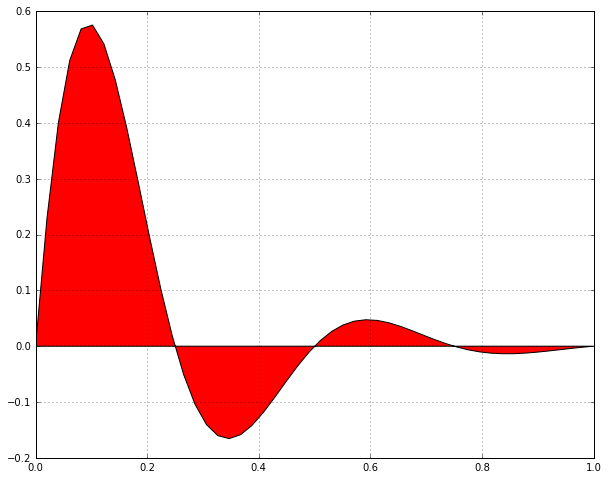

In [61]:
import numpy as np
import matplotlib.pyplot as plt
    
    
x = np.linspace(0, 1)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)
    
plt.fill(x, y, 'r')
plt.grid(True)
plt.show()

<br>
<div class="alert alert-info">
<b>Exercise 3 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

# 4. Using Pandas and Matplotlib: Additional examples
You are not required to perform any actions in this section. It is purely to demonstrate sample code, which you can reference at a later stage, should you need examples of syntax.

## 4.1 Example: Date range and data density

Generate the data set to be utilized in this example. The details are not important at this stage.

In [ ]:
# Create Pandas date range with starting date, number of periods and frequency as input arguments.
r1 = pd.date_range('2014/01/01', periods=12, freq='M')
r2 = pd.date_range('2015/01/01', periods=365, freq='D')
r3 = pd.date_range('2015/01/01', periods=365, freq='D')
r4 = pd.date_range('2015/01/01', periods=365, freq='D')
r5 = pd.date_range('2016/01/01', periods=6, freq='M')

# Create a list containing all the date ranges.
r = r1.append(r2).append(r3).append(r4).append(r5)

# Convert the list to a series with random values using the Numpy random function indexed by date.
ts = pd.Series(np.random.randn(len(r)), index=r)

# Display the head of the series.
ts.head()

In [ ]:
# Display the type of the variable.
type(ts)

In [ ]:
# Show summary statistics of numeric data.
ts.describe()

When performing recency checks, one is often tempted to only retrieve the latest record.

In [ ]:
# Return the min and max date.
print ts.index.min()
print ts.index.max()

In some cases, the minimum and maximum values do not tell you the full story, and you may need to dig a bit deeper to better understand the data set. In the generated data set, there is a difference in granularity, with more frequent observations during 2015 than in 2014 and 2016.

Depending on the type of analysis you are performing, you may choose to:
- Work with the data set as is;
- Work with a subset of the data; or
- Resample the data (advanced).

In [ ]:
# Review the date distribution of the data graphically.
ts.plot(title="Observations",figsize=[12,5])

The plot shows a higher density of observations during 2015. A new series will now be created, which contains a subset of the original series that contains data from 2015. Please refer to the links to read more about Pandas methods, namely [slicing ranges](http://pandas.pydata.org/pandas-docs/stable/indexing.html#slicing-ranges) and [selection by position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#selection-by-position).

In [ ]:
# Create a new data frame, tsc, containing the subset of 2015 data and print the minimum and maximum values.
tsc = ts.loc['2015-1-1':'2015-12-31']
print tsc.index.min()
print tsc.index.max()

In [ ]:
# Plot the new dataset.
tsc.plot(title="Observations",figsize=[12,5])

## 4.2 Example: Histogram of a normal distribution with a best fit line

In [ ]:
# Example data.
mu = 100  # Mean of distribution.
sigma = 15  # Standard deviation of distribution.
x = mu + sigma * np.random.randn(100000) # Generate 100 000 data points.
num_bins = 50 # Set the number of bins.

# Create histogram and best fit line.
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)
y = mlab.normpdf(bins, mu, sigma)

# Plot.
plt.plot(bins, y, 'r--')
plt.xlabel('Title')
plt.ylabel('Probability')
plt.title(r'Histogram of Random Data: $\mu=100$, $\sigma=15$')
plt.show()

# 5. Submit your notebook

Please make sure that you:
- Perform a final "Save and Checkpoint";
- Download a copy of the notebook in ".ipynb" format to your local machine using "File", "Download as", and "IPython Notebook (.ipynb)"; and 
- Submit a copy of this file to the Online Campus.

## 6. Additional Resources

- *Python for Data Analysis Data Wrangling with Pandas, NumPy, and IPython*, Wes McKinney, 2012, O'Reilly Media
- [Modern Pandas](http://tomaugspurger.github.io/modern-1.html) - A series of blogs on writing idiomatic pandas code 